In [1]:
import os
os.getcwd()

'/home/matthew/anaconda3/envs/insight/staycationLA/notebooks'

In [4]:
pip install wordcloud

     |████████████████████████████████| 364 kB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [8]:
#analysis based on: https://www.kaggle.com/mrisdal/shifterator-analysis-on-animal-crossing-reviews


In [9]:
pip install shifterator

     |████████████████████████████████| 40.4 MB 14.7 MB/s eta 0:00:01   |███▎                            | 4.1 MB 2.9 MB/s eta 0:00:13     |████▉                           | 6.1 MB 2.9 MB/s eta 0:00:12     |███████▋                        | 9.6 MB 2.9 MB/s eta 0:00:11     |████████▎                       | 10.5 MB 2.9 MB/s eta 0:00:11     |██████████▋                     | 13.4 MB 2.9 MB/s eta 0:00:10MB/s eta 0:00:09     |████████████████▋               | 21.0 MB 7.7 MB/s eta 0:00:03     |█████████████████▊              | 22.4 MB 7.7 MB/s eta 0:00:03     |███████████████████▌            | 24.6 MB 7.7 MB/s eta 0:00:03     |████████████████████            | 25.3 MB 7.7 MB/s eta 0:00:02     |█████████████████████▍          | 27.0 MB 7.7 MB/s eta 0:00:02     |███████████████████████▏        | 29.2 MB 7.7 MB/s eta 0:00:02     |████████████████████████▏       | 30.6 MB 7.7 MB/s eta 0:00:02     |██████████████████████████▋     | 33.6 MB 7.7 MB/s eta 0:00:01
Note: you may need to restart the k

In [25]:
# Import packages

import pandas as pd
import numpy as np
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re

from shifterator import relative_shift as rs

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [ ]:
reviews = pd.#read_csv("../input/animal-crossing/user_reviews.csv", encoding='utf-8')

In [60]:
# Load in the dataframe
phu1 = pd.read_csv("../data/raw/phuket.csv", names=['stars', 'title', 'text'])
#../../../ each ../ goes up one folder level

In [61]:
#remove reviews that are not in english
phu=phu1[0:103]

In [62]:
phu.head

<bound method NDFrame.head of      stars                                       title  \
0       50                               “A must see!”   
1       50  “INDIE Bric a Brac accessories for unisex”   
2       20            “If I Knew Then What I Know Now”   
3       20                       “Over crowded Phuket”   
4       50                         “Driving in Phuket”   
..     ...                                         ...   
98      50                            “Best time ever”   
99      40             “Loved the Gibbons and beaches”   
100     50                      “Adventures in Phuket”   
101     50                 “tsunami Travellers Update”   
102     50    “Details of affect of Tsumani on Phuket”   

                                                  text  
0    When I was here last November it was raining c...  
1    Indie Bric a Brac and accessories shop, is lik...  
2    My boyfriend and I decided to live in Phuket f...  
3    I made my first trip to Phuket in the mi

In [63]:
# Divide reviews into positive and negative based on the median grade for the dataset
median_stars = 35

phu.loc[phu['stars'] <= median_stars, 'review_category'] = 'Negative' 
phu.loc[phu['stars'] > median_stars, 'review_category'] = 'Positive' 

phu_neg = phu[phu['review_category'] == 'Negative']
phu_pos = phu[phu['review_category'] == 'Positive']

/home/matthew/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/matthew/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
phu_neg.head

<bound method NDFrame.head of     stars                                              title  \
2      20                   “If I Knew Then What I Know Now”   
3      20                              “Over crowded Phuket”   
12     10                    “Blue Canyon Lakes golf course”   
13     30                             “Great place to relax”   
16     10               “BEWARE AIRPORT SECURITY IN PHUKET!”   
19     10                        “Skip Phuket and the hype!”   
24     10      “Thai Airways International RelationsManager”   
33     20  “Phuket for mass tourism – Ko Samui for more e...   
34     30    “What they don't tell you about day excursions”   
42     20                          “Not a very clean place!”   
47     10                                     “Avoid Phuket”   
56     20       “Good tourist spot but overall disappointed”   
59     30                             “Holidaying in Phuket”   
62     30                            “Good first experience”   
64     30 

In [65]:
phu_pos.head

<bound method NDFrame.head of      stars                                       title  \
0       50                               “A must see!”   
1       50  “INDIE Bric a Brac accessories for unisex”   
4       50                         “Driving in Phuket”   
5       50                       “phuket scooter hire”   
6       40                      “Phuket taxi and cost”   
..     ...                                         ...   
98      50                            “Best time ever”   
99      40             “Loved the Gibbons and beaches”   
100     50                      “Adventures in Phuket”   
101     50                 “tsunami Travellers Update”   
102     50    “Details of affect of Tsumani on Phuket”   

                                                  text review_category  
0    When I was here last November it was raining c...        Positive  
1    Indie Bric a Brac and accessories shop, is lik...        Positive  
4    Phuket is best viewed through the car window. ...

In [66]:
texts = phu['text'].tolist()
texts_neg = phu_neg['text'].tolist()
texts_pos = phu_pos['text'].tolist()

In [67]:
# We will want to remove stop words
stop_words = set(stopwords.words('english'))

In [68]:
def remove_punctuation(txt):
    """Replace URLs and other punctuation found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with URLs and punctuation removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [69]:
def clean_text(txt):
    """Removes punctuation, changes to lowercase, removes
        stopwords, removes "animal" and "crossing", and
        calculates word frequencies.

    Parameters
    ----------
    txt : string
        A text string that you want to clean.

    Returns
    -------
    Words and frequencies
    """
    
    tmp = [remove_punctuation(t) for t in txt]
    tmp = [t.lower().split() for t in tmp]
    
    tmp = [[w for w in t if not w in stop_words]
              for t in tmp]
    tmp = [[w for w in t if not w in ['animal', 'crossing']]
                     for t in tmp]
    
    tmp = list(itertools.chain(*tmp))
    tmp = collections.Counter(tmp)
        
    return tmp

In [70]:
# Clean up the review texts
clean_texts_neg = clean_text(texts_neg)
clean_texts_pos = clean_text(texts_pos)

In [71]:
#clean_texts_neg

In [72]:
#clean_texts_pos

In [73]:
# Dataframes for most frequent common words in positive and negative reviews
common_neg = pd.DataFrame(clean_texts_neg.most_common(15),
                             columns=['words', 'count'])
common_pos = pd.DataFrame(clean_texts_pos.most_common(15),
                             columns=['words', 'count'])



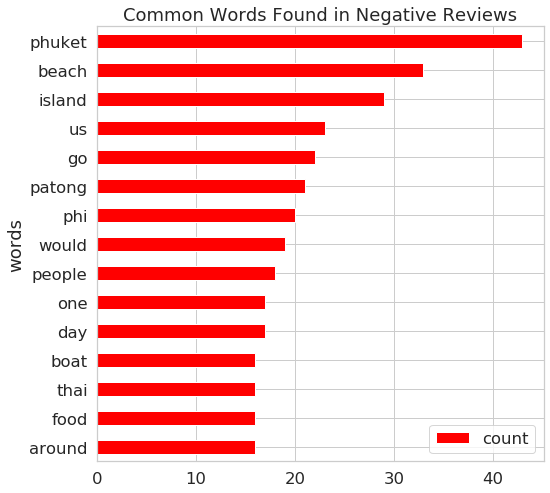

In [74]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
common_neg.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Negative Reviews")

plt.show()

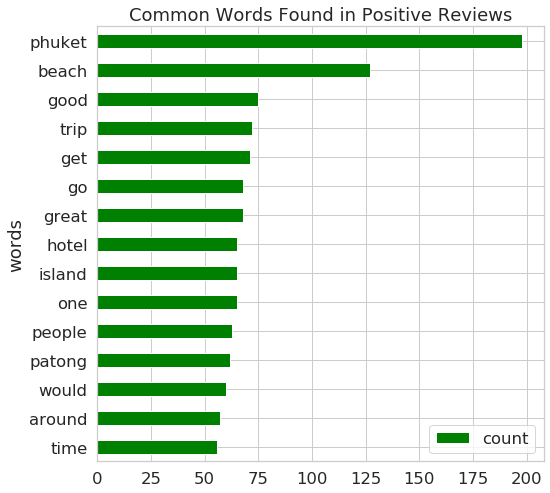

In [75]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
common_pos.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Positive Reviews")

plt.show()

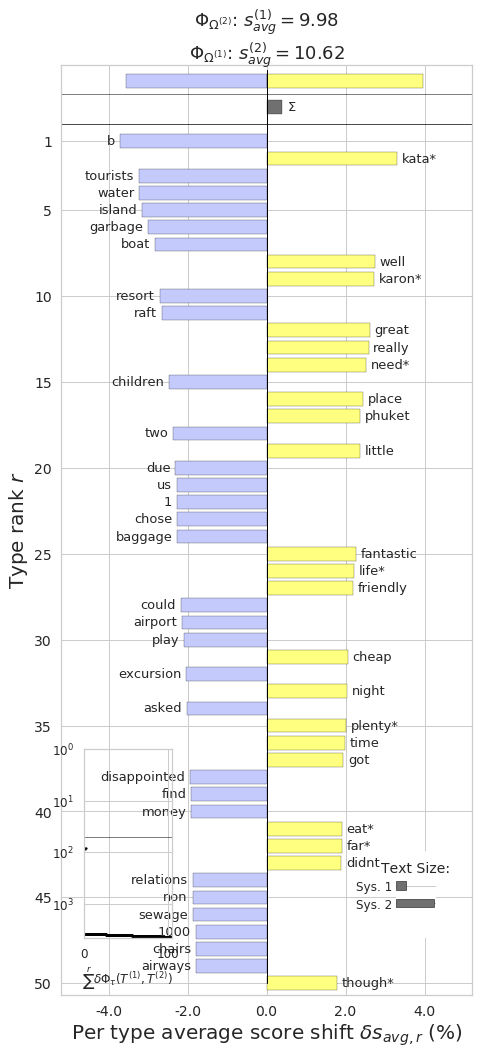

In [76]:
# Get an entropy shift
entropy_shift = rs.EntropyShift(reference=clean_texts_neg,
                                comparison=clean_texts_pos,
                                base=2)
entropy_shift.get_shift_graph() 


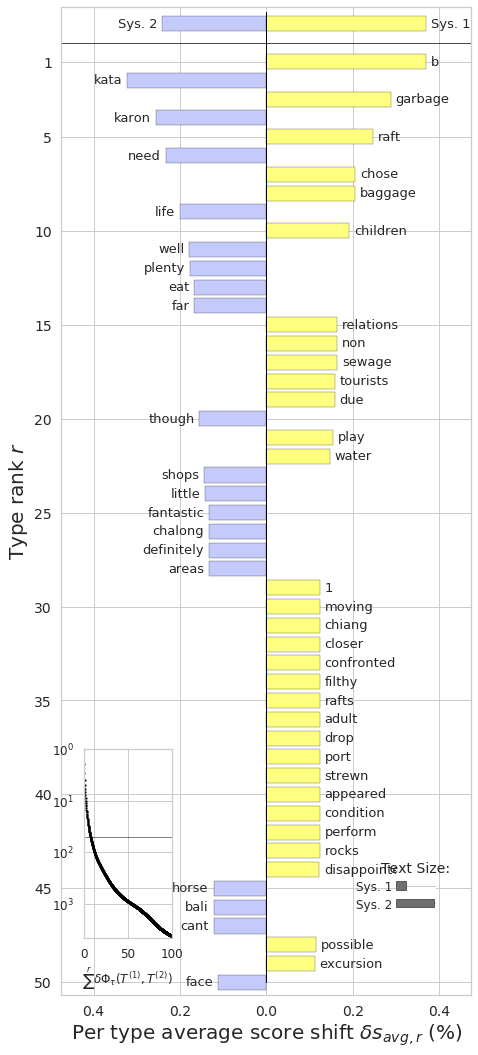

In [77]:
# Get a Jensen-Shannon divergence shift
#The Jensen-Shannon divergence symmetrizes the Kullback-Leibler divergence by measuring the 
#average divergence of each text from another text representing their average. 
#The measure is symmetric, meaning there is no order in how the texts are specified.
from shifterator import symmetric_shift as ss
jsd_shift = ss.JSDivergenceShift(system_1=clean_texts_neg,
                                 system_2=clean_texts_pos,
                                 base=2)
jsd_shift.get_shift_graph()